In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer = pd.read_csv("DataModified.csv")

In [3]:
cancer.head() #observing data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


What Variables to choose? I want to choose variables that are more correlated with a cell being positive for cancer.

In [4]:
#add dummy variables 
cancer['positive'] = cancer.diagnosis.map({'B':0,'M':1}) #new dummy column for diagnosis
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,positive
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


From here. Im going to export this csv into R and use the Lares package to see what variables have the highest correlation for cancer positivity

In [5]:
cancer.to_csv('cancerwpositive.csv', index = False)

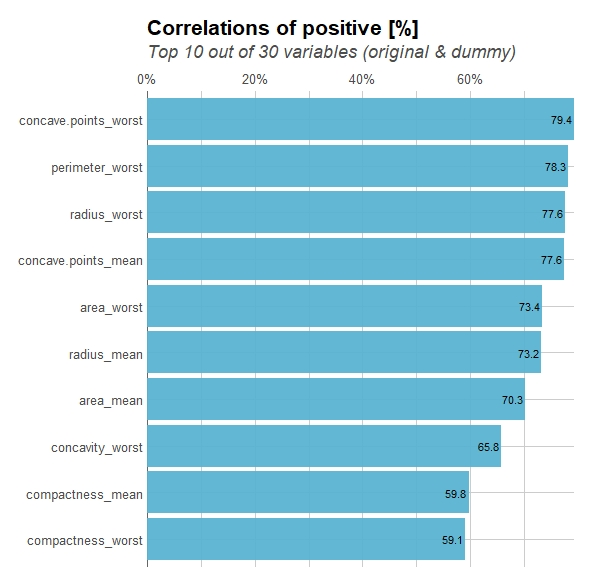

In [6]:
from IPython.display import Image
Image(r"C:\Users\sahil\Downloads\corroplotc2.jpeg") 

I will be choosing to explore these 10 features as apart of my project. I'm hoping they will make my machine learning models accurate

In [7]:
cancer = cancer.drop(cancer.columns[[0,3,4,6,8,10,11,12,13,14,15,16,17,18,19,20,21,23,26,30,31]], axis = 1)
cancer.head()

,diagnosis,radius_mean,area_mean,compactness_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,positive
0,M,17.99,1001.0,0.27760,0.14710,25.38,184.60,2019.0,0.6656,0.7119,0.2654,1
1,M,20.57,1326.0,0.07864,0.07017,24.99,158.80,1956.0,0.1866,0.2416,0.1860,1
2,M,19.69,1203.0,0.15990,0.12790,23.57,152.50,1709.0,0.4245,0.4504,0.2430,1
3,M,11.42,386.1,0.28390,0.10520,14.91,98.87,567.7,0.8663,0.6869,0.2575,1
4,M,20.29,1297.0,0.13280,0.10430,22.54,152.20,1575.0,0.2050,0.4000,0.1625,1


In [8]:
print(cancer.describe(include = ['object'])) #observing diagnosis
print(569-357)

       diagnosis
count        569
unique         2
top            B
freq         357
212


In [9]:
cancer.describe() #stats

,radius_mean,area_mean,compactness_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,positive
count,568.000000,568.000000,568.000000,567.000000,567.000000,569.000000,569.000000,569.000000,568.000000,569.000000,569.000000
mean,14.130245,654.229225,0.104354,0.048854,16.276118,107.261213,880.583128,0.254265,0.271431,0.114606,0.372583
std,3.526450,353.150358,0.052858,0.038787,4.840100,33.602542,569.356993,0.157336,0.208023,0.065732,0.483918
min,6.981000,0.800000,0.019380,0.000000,7.930000,50.410000,185.200000,0.027290,0.000000,0.000000,0.000000
25%,11.697500,419.900000,0.064815,0.020310,13.010000,84.110000,515.300000,0.147200,0.114475,0.064930,0.000000
50%,13.375000,548.750000,0.092525,0.033500,14.970000,97.660000,686.500000,0.211900,0.226550,0.099930,0.000000
75%,15.797500,784.150000,0.130425,0.073820,18.800000,125.400000,1084.000000,0.339100,0.381400,0.161400,1.000000
max,28.110000,2501.000000,0.345400,0.201200,36.040000,251.200000,4254.000000,1.058000,1.252000,0.291000,1.000000


In [10]:
cancer_stats = {'median': [13.375,548.75,0.092525,0.033500,14.97,97.66,686.5,0.211,0.22655,0.099930], 
        'var': [12.435853,124715.175511,0.002794,0.001504,23.426565,1129.130847,324167.385102,0.024755,0.043274,0.004321]}

In [11]:
df = pd.DataFrame(cancer_stats, columns = ['median', 'var'], index = ['radius_mean','area_mean','compactness_mean','concave points_mean','radius_worst','perimeter_worst','area_worst','compactness_worst','concavity_worst','concave points_worst'])
df
#additional stats

,median,var
radius_mean,13.375000,12.435853
area_mean,548.750000,124715.175511
compactness_mean,0.092525,0.002794
concave points_mean,0.033500,0.001504
radius_worst,14.970000,23.426565
perimeter_worst,97.660000,1129.130847
area_worst,686.500000,324167.385102
compactness_worst,0.211000,0.024755
concavity_worst,0.226550,0.043274
concave points_worst,0.099930,0.004321


In [12]:
filt_df = cancer.loc[:, cancer.columns != 'positive',]
low = .0001
high = .9999
quant_df = filt_df.quantile([low, high])
print(quant_df)
#outliers

        radius_mean   area_mean  compactness_mean  concave points_mean  \
0.0001     7.021257     8.89109          0.019610              0.00000   
0.9999    28.070877  2500.88660          0.343472              0.20064   

        radius_worst  perimeter_worst  area_worst  compactness_worst  \
0.0001      7.972337        50.641744   187.38112           0.027689   
0.9999     35.875294       249.956080  4207.31040           1.051178   

        concavity_worst  concave points_worst  
0.0001         0.000000               0.00000  
0.9999         1.247351               0.29096  


In [13]:
cancer.dtypes #all variables are numerical except for diagnosis which is categorical

diagnosis                object
radius_mean             float64
area_mean               float64
compactness_mean        float64
concave points_mean     float64
radius_worst            float64
perimeter_worst         float64
area_worst              float64
compactness_worst       float64
concavity_worst         float64
concave points_worst    float64
positive                  int64
dtype: object

In [14]:
cancer.isna().mean().round(3) # percentage of missing values in each column
#another method
cancer_missing = cancer.isna()
cancer_missing.sum() #number of missing values in each column

diagnosis               0
radius_mean             1
area_mean               1
compactness_mean        1
concave points_mean     2
radius_worst            2
perimeter_worst         0
area_worst              0
compactness_worst       0
concavity_worst         1
concave points_worst    0
positive                0
dtype: int64

C:\Users\sahil\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sahil\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


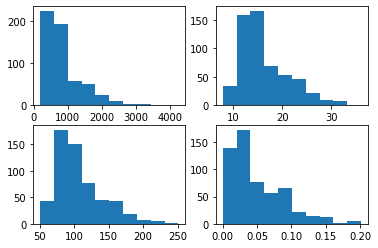

In [15]:
#we are going to examine distribtuion among the top 5 correlated variables with being positive for cancer
plt.subplot(2, 2, 1)  
plt.hist(cancer['area_worst']) #top left
plt.subplot(2, 2, 2)  
plt.hist(cancer['radius_worst']) #top right
plt.subplot(2, 2, 3)
plt.hist(cancer['perimeter_worst']) #bottom left
plt.subplot(2, 2, 4)
plt.hist(cancer['concave points_mean']) #bottom right
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F299770>]],
      dtype=object)

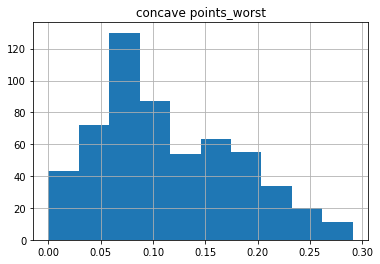

In [16]:
cancer.hist('concave points_worst') #1 correlation with diagnosis. 

In [17]:
#engineer new feature. Im going to add up some columns that are highly correlated with positivity from the imported R graph. area_worst, radius_worst, and perimeter_worst to a new column called size_worst
cancer['size_worst'] = cancer.area_worst + cancer.radius_worst + cancer.perimeter_worst
cancer.head()

,diagnosis,radius_mean,area_mean,compactness_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,positive,size_worst
0,M,17.99,1001.0,0.27760,0.14710,25.38,184.60,2019.0,0.6656,0.7119,0.2654,1,2228.98
1,M,20.57,1326.0,0.07864,0.07017,24.99,158.80,1956.0,0.1866,0.2416,0.1860,1,2139.79
2,M,19.69,1203.0,0.15990,0.12790,23.57,152.50,1709.0,0.4245,0.4504,0.2430,1,1885.07
3,M,11.42,386.1,0.28390,0.10520,14.91,98.87,567.7,0.8663,0.6869,0.2575,1,681.48
4,M,20.29,1297.0,0.13280,0.10430,22.54,152.20,1575.0,0.2050,0.4000,0.1625,1,1749.74


In [18]:
filt = (cancer['area_mean'] < 2500) & (cancer['compactness_worst'] < 1.058) & (cancer['concavity_worst'] < 1.252) & (cancer['concavity_worst'] > 0) & (cancer['area_worst'] < 4254) & (cancer['concave points_worst'] > 0) 
#removing outliers without trying to lose too much data. Did 99.99 percent outlier identification in this case
cancer = cancer[filt]

In [19]:
cancer['positive'] = cancer.diagnosis.map({'B':0,'M':1})  #add this column back

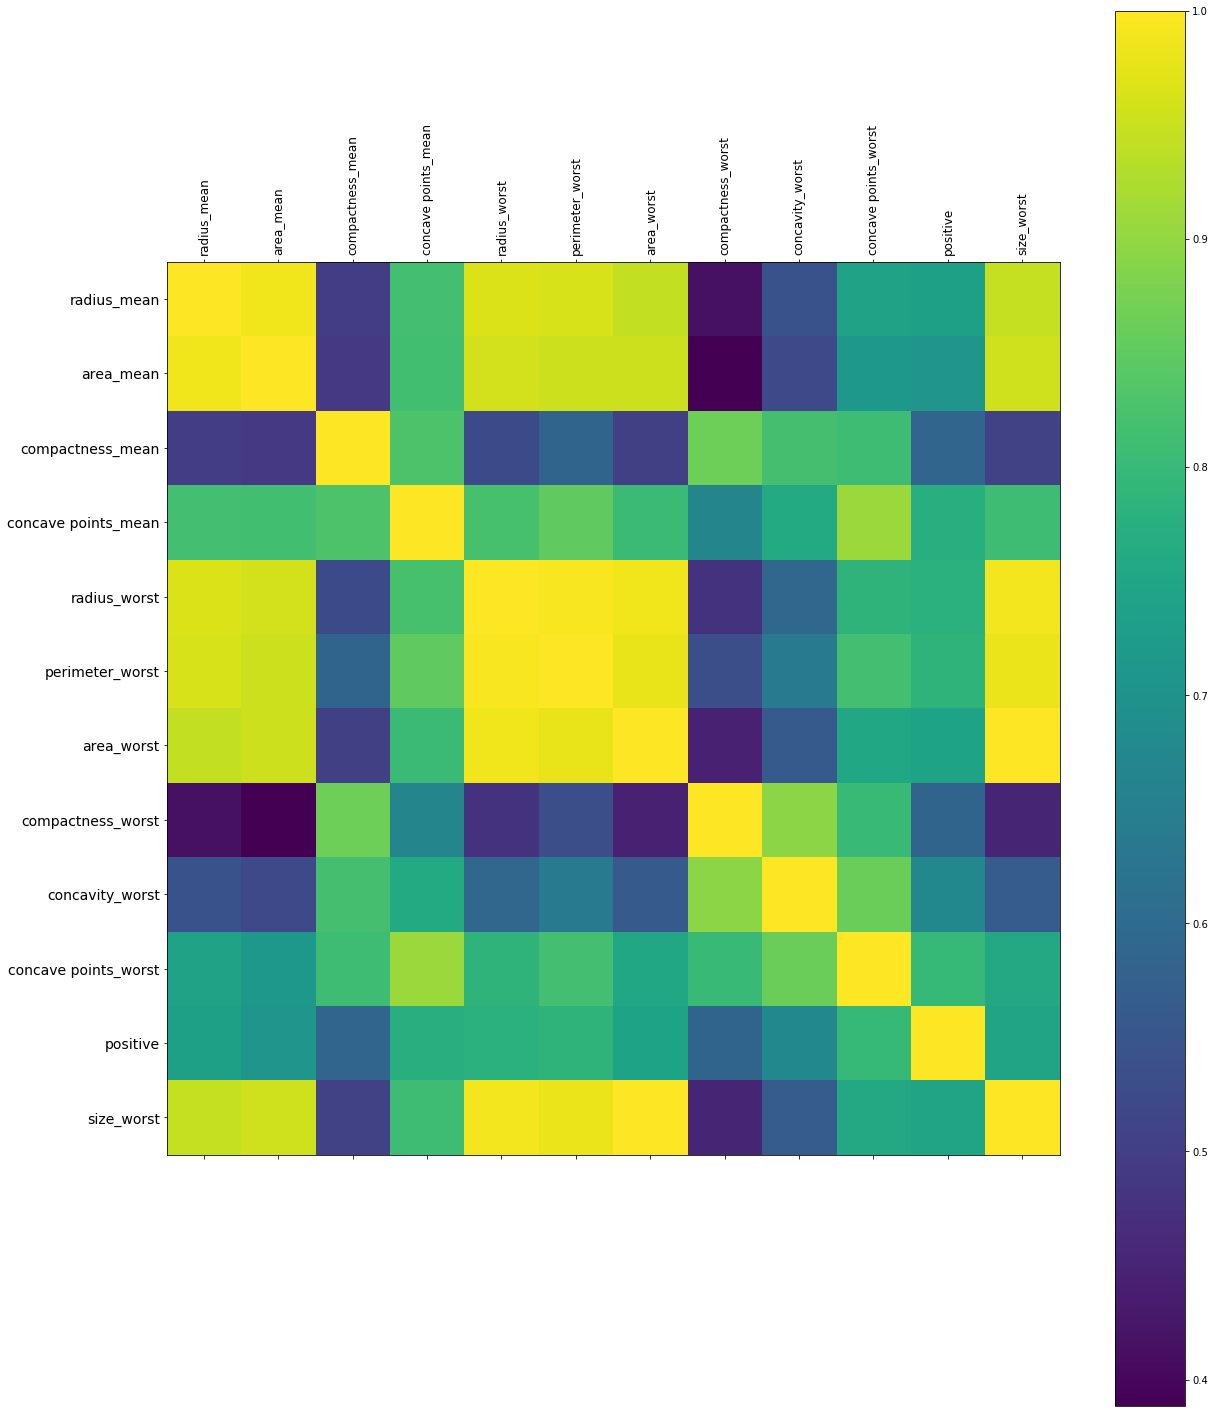

In [20]:
cancermat = cancer.drop(cancer.columns[[0]], axis = 1)
f = plt.figure(figsize=(20, 25))
plt.matshow(cancermat.corr(), fignum=f.number)
plt.xticks(range(cancermat.shape[1]), cancermat.columns, fontsize=12, rotation=90)
plt.yticks(range(cancermat.shape[1]), cancermat.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

In [21]:
#add diagnosis column back
cancer['diagnosis'] = cancer.positive.map({0:'B',1:'M'})
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 567
Data columns (total 13 columns):
diagnosis               551 non-null object
radius_mean             550 non-null float64
area_mean               551 non-null float64
compactness_mean        550 non-null float64
concave points_mean     549 non-null float64
radius_worst            549 non-null float64
perimeter_worst         551 non-null float64
area_worst              551 non-null float64
compactness_worst       551 non-null float64
concavity_worst         551 non-null float64
concave points_worst    551 non-null float64
positive                551 non-null int64
size_worst              549 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 58.1+ KB


# Machine Learning

In [22]:
cancer.info() #recap of what we have so far

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 567
Data columns (total 13 columns):
diagnosis               551 non-null object
radius_mean             550 non-null float64
area_mean               551 non-null float64
compactness_mean        550 non-null float64
concave points_mean     549 non-null float64
radius_worst            549 non-null float64
perimeter_worst         551 non-null float64
area_worst              551 non-null float64
compactness_worst       551 non-null float64
concavity_worst         551 non-null float64
concave points_worst    551 non-null float64
positive                551 non-null int64
size_worst              549 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 58.1+ KB


In [23]:
#Knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [54]:
cancernona = cancer.dropna() #drop all rows with NA's
y = cancernona['diagnosis'].values
X = cancernona.drop('diagnosis', axis = 1).values
neighbors = [1,2,3,4,5,6,7,8]
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=28, stratify=y)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    print(str(neighbor) + " " + str(round(knn.score(X_test, y_test),2)))
    
#3 neighbors is the most accurate model    

1 0.94
2 0.93
3 0.97
4 0.95
5 0.96
6 0.94
7 0.95
8 0.94


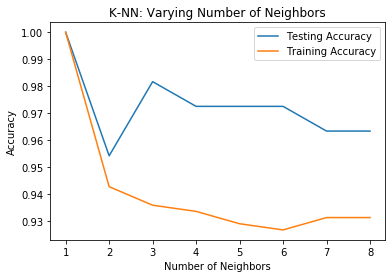

In [56]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over the different values of k (neighbors)
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the Classifier
    knn.fit(X, y)
    # Compute Accuracy on training set
    train_accuracy[i] = knn.score(X_train, y_train)
    # Compute Accuracy on test set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate Plots
plt.title('K-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [57]:
#logistic regresion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
X = (X-np.min(X))/(np.max(X)-np.min(X)) #normalize data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[129   0]
 [ 27  62]]
              precision    recall  f1-score   support

           B       0.83      1.00      0.91       129
           M       1.00      0.70      0.82        89

    accuracy                           0.88       218
   macro avg       0.91      0.85      0.86       218
weighted avg       0.90      0.88      0.87       218



C:\Users\sahil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
#clear plot
plt.clf()

#the problem is my model is predicting alot of malignant tumors as begnin. Very bad

<Figure size 432x288 with 0 Axes>

In [76]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label = 'M') 



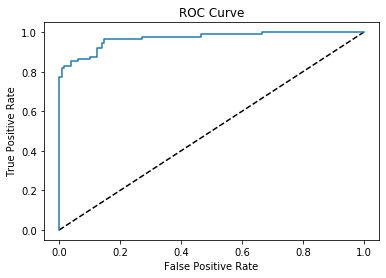

In [77]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
for i in cv_scores:
    print(f"{round(i * 100,3)}% Accuracy")

AUC: 0.9689922480620154
94.363% Accuracy
97.561% Accuracy
97.525% Accuracy
96.449% Accuracy
98.107% Accuracy


C:\Users\sahil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sahil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sahil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sahil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sahil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [84]:
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

In [85]:
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-4, 4, 20)
param_grid = {'C': c_space}

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

#having a c-value of 545 increases the accuracy of the model a little bit

Tuned Logistic Regression Parameters: {'C': 545.5594781168514}
Best score is 0.9247706422018349


In [ ]:
#trees